### Plot USGS gage data from the Trinity River, TX

Created by Mariel Nelson on June 21, 2021

In [1]:
import dataretrieval.nwis as nwis

from datetime import datetime, date, time, timedelta
import matplotlib as mpl
#import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
#from pandas.api.types import CategoricalDtype
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

%matplotlib inline
%matplotlib widget
%config InlineBackend.figure_format = 'png'

pd.options.display.max_columns = 50
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 16

### [metadata for columns - link](https://nwis.waterdata.usgs.gov/nwis/qwdata?site_no=08067000&agency_cd=USGS&inventory_output=0&rdb_inventory_output=file&TZoutput=0&pm_cd_compare=Greater%20than&radio_parm_cds=all_parm_cds&format=html_table&qw_attributes=0&qw_sample_wide=wide&rdb_qw_attributes=0&date_format=YYYY-MM-DD&rdb_compression=file&submitted_form=brief_list)

In [2]:
site = '08067000' # USGS unique ID for gage 'Trinity Rv at Liberty, TX' (LBYT2)

Services available from NWIS include:

* instantaneous values (iv)
* daily values (dv)
* statistics (stat)
* site info (site)
* discharge peaks (peaks)
* discharge measurements (measurements)
* water quality samples (qwdata)

In [3]:
daily = nwis.get_record(sites=site, service='dv', start='2000-01-01', end='2021-01-01')

# get water quality samples (qwdata)
df2 = nwis.get_record(sites=site, service='qwdata')

# get basic info about the site
liberty_info = nwis.get_record(sites=site, service='site')

In [6]:
liberty_info

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,district_cd,state_cd,county_cd,country_cd,land_net_ds,map_nm,map_scale_fc,alt_va,alt_meth_cd,alt_acy_va,alt_datum_cd,huc_cd,basin_cd,topo_cd,instruments_cd,construction_dt,inventory_dt,drain_area_va,contrib_drain_area_va,tz_cd,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,08067000,"Trinity Rv at Liberty, TX",ST,300327,944905,30.057715,-94.818257,M,F,NAD27,NAD83,48,48,291,US,NaN,"Liberty, TX",24000,-2.22,L,0.5,NGVD29,12030203,NaN,NaN,NNNNYNNNNNNNNNNNNNNNNNNNNNNNNN,NaN,NaN,17468,17468,CST,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,8653-00150


In [7]:
df2

,agency_cd,site_no,sample_end_dt,sample_end_tm,tm_datum_rlbty_cd,coll_ent_cd,medium_cd,project_cd,aqfr_cd,tu_id,body_part_id,hyd_cond_cd,samp_type_cd,hyd_event_cd,sample_lab_cm_txt,p00004,p00010,p00020,p00025,p00041,p00060,p00061,p00063,p00065,p00070,...,p84164,p84171,p84182,p90095,p91157,p91158,p91159,p99105,p99111,p99156,p99158,p99159,p99161,p99162,p99163,p99165,p99171,p99172,p99173,p99174,p99200,p99202,p99206,p99775,p99870
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1969-09-18 14:15:00+00:00,USGS,08067000,NaN,NaN,T,NaN,WS,NaN,NaN,NaN,NaN,A,9,9,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-10-08 20:00:00+00:00,USGS,08067000,NaN,NaN,T,NaN,WS,NaN,NaN,NaN,NaN,A,9,9,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-11-20 16:15:00+00:00,USGS,08067000,NaN,NaN,T,NaN,WS,NaN,NaN,NaN,NaN,A,9,9,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-12-10 21:30:00+00:00,USGS,08067000,NaN,NaN,T,NaN,WS,NaN,NaN,NaN,NaN,A,9,9,NaN,NaN,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-14 18:45:00+00:00,USGS,08067000,NaN,NaN,T,NaN,WS,NaN,NaN,NaN,NaN,A,9,9,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18 17:01:00+00:00,USGS,08067000,NaN,NaN,K,USGS-WRD,WS,00U461900,NaN,NaN,NaN,6,9,9,NaN,470,23.1,22.4,NaN,NaN,NaN,32100,10.0,26.54,NaN,...,3058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 19:00:00+00:00,USGS,08067000,NaN,NaN,K,USGS-WRD,SB,00U461900,NaN,NaN,NaN,6,9,9,NaN,470,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,1060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,USGS,08067000,NaN,NaN,T,NaN,WS,NaN,NaN,NaN,NaN,A,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 00060_Mean is daily mean discharge, cubic feet per second
# 00065_Mean is daily mean gage height, feet

In [9]:
# check metadata to look for shift in low values 

In [10]:
%matplotlib widget
daily['00065_Mean'].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='datetime'>

In [11]:
# when was rating curve last updated

In [12]:
%matplotlib widget
daily['00060_Mean'].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='datetime'>

In [13]:
daily.index

DatetimeIndex(['2000-01-01 00:00:00+00:00', '2000-01-02 00:00:00+00:00',
               '2000-01-03 00:00:00+00:00', '2000-01-04 00:00:00+00:00',
               '2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-08 00:00:00+00:00',
               '2000-01-09 00:00:00+00:00', '2000-01-10 00:00:00+00:00',
               ...
               '2020-12-23 00:00:00+00:00', '2020-12-24 00:00:00+00:00',
               '2020-12-25 00:00:00+00:00', '2020-12-26 00:00:00+00:00',
               '2020-12-27 00:00:00+00:00', '2020-12-28 00:00:00+00:00',
               '2020-12-29 00:00:00+00:00', '2020-12-30 00:00:00+00:00',
               '2020-12-31 00:00:00+00:00', '2021-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=7518, freq=None)

(14975.0, 15339.0)

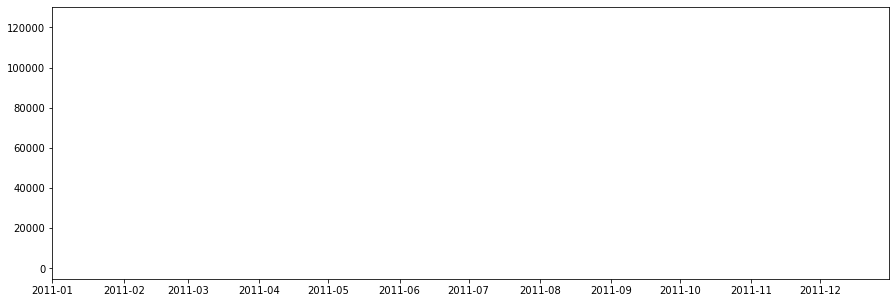

In [14]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(daily['00060_Mean'], c='dodgerblue')
ax.set_xlim((datetime(2011, 1, 1), datetime(2011, 12, 31)))

In [15]:
# daily[daily.index > datetime(2011, 1, 1)]

mask = (daily.index > '2011-1-1') & (daily.index < '2011-12-31')
daily.loc[mask].dropna()

,00060_Mean,00060_Mean_cd,site_no,00065_Mean,00065_Mean_cd
datetime,,,,,


In [16]:
no_data = daily[daily['00060_Mean'].isnull()].index

Text(0.5, 1.0, 'Days with NaN discharge')

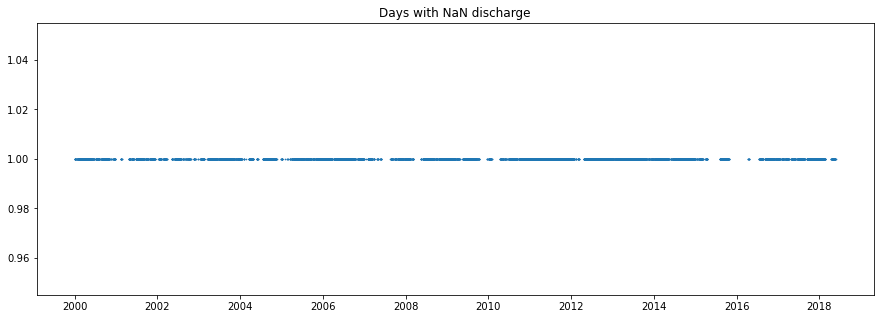

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(no_data, np.ones_like(no_data), s=0.5)
ax.set_title('Days with NaN discharge')

In [18]:
# p80154 is suspended sed concentration in mg/L
sed = df2['p80154'].dropna().sort_values()

Text(0.5, 1.0, 'Suspended sediment, mg/L')

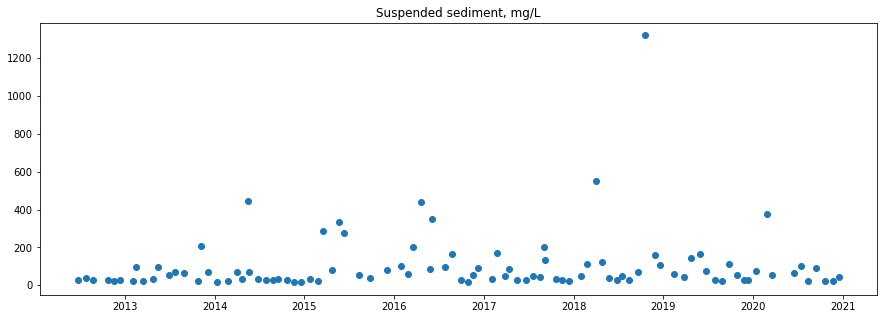

In [19]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(sed.index, sed)
ax.set_title('Suspended sediment, mg/L')